In [12]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [9]:
BASE_PATH = './grape_base/'
black_measles_imgs = os.listdir(BASE_PATH+'black_measles')
black_measles_imgs = [BASE_PATH+'black_measles/'+img for img in black_measles_imgs]

leaf_blight_imgs = os.listdir(BASE_PATH+'leaf_blight')
leaf_blight_imgs = [BASE_PATH+'leaf_blight/'+img for img in leaf_blight_imgs]

black_rot_imgs = os.listdir(BASE_PATH+'black_rot')
black_rot_imgs = [BASE_PATH+'black_rot/'+img for img in black_rot_imgs]

healthy_imgs = os.listdir(BASE_PATH+'healthy')
healthy_imgs = [BASE_PATH+'healthy/'+img for img in healthy_imgs]

In [3]:
def plot_matrix_list(images_list, size_a=16, size_b=16):
    
    lines = (len(images_list)//4)+1
    plt.figure(figsize=(size_a, size_b))
    
    for i in range(len(images_list)):
        plt.subplot(lines,4,i+1)
        plt.imshow(images_list[i])
        #plt.title(str(i+1))
        
    
    plt.show()
    plt.close('all')

In [10]:
#img as matrix
def histograma(img):

    '''
    retorna histograma de cores da imagem
    '''
    WB = np.zeros(256)
    WG = np.zeros(256)
    WR = np.zeros(256)
    
    l, c, tres = img.shape
    
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]
    
    img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    H = img_HSV[:,:,0]
    S = img_HSV[:,:,1]
    V = img_HSV[:,:,2]
    
    THR = 50
    
    for i in range(l):
        for j in range(c):
            if(not(((S[i,j] < THR or V[i,j] < THR) or H[i,j] > 100) or (not(B[i,j] < 100)))):
                WB[B[i,j]] = WB[B[i,j]]+1
                WG[G[i,j]] = WG[G[i,j]]+1 
                WR[R[i,j]] = WR[R[i,j]]+1
          
    for i in range(256):
        WB[i] = WB[i]/(l*c)
        WG[i] = WG[i]/(l*c)
        WR[i] = WR[i]/(l*c)
    #return np.append(np.append(WB,WG),WR)
    return [WB,WG,WR]

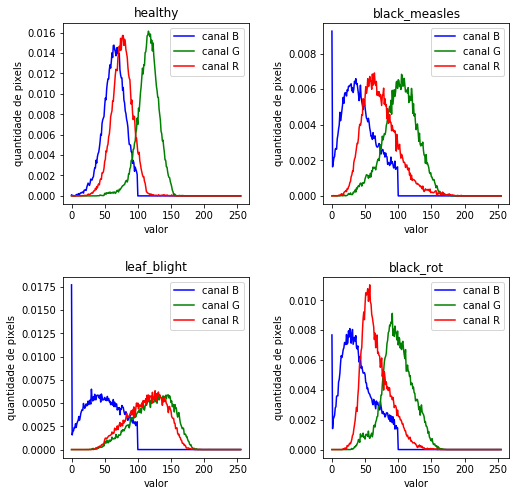

In [13]:
sample = [healthy_imgs[0], black_measles_imgs[0], leaf_blight_imgs[0], black_rot_imgs[0]]
titles = ['healthy', 'black_measles', 'leaf_blight', 'black_rot']

plt.figure(figsize = (8,8))
for i in range(len(sample)):
    img = cv2.imread(sample[i])
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    hist = histograma(img)
    plt.plot(hist[0], color='blue')
    plt.plot(hist[1], color='green')
    plt.plot(hist[2], color='red')
    plt.legend(['canal B', 'canal G', 'canal R'])
    plt.xlabel('valor')
    plt.ylabel('quantidade de pixels')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

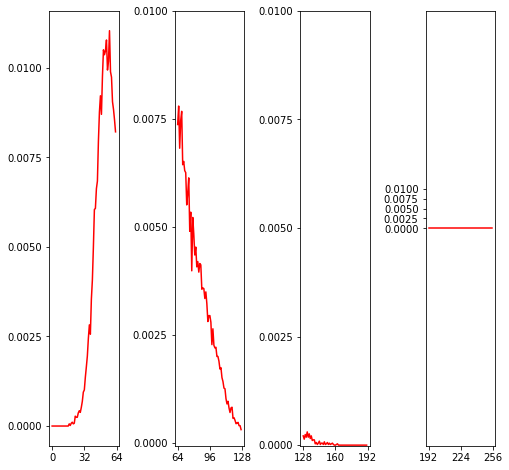

In [55]:
img_path = sample[3]
img = cv2.imread(img_path)

plt.figure(figsize = (8,8))
y_ticks = [0, 0.0025, 0.005, 0.0075, 0.01]


plt.subplot(2,2,i+1)
hist = histograma(img)
plt.subplot(1,4,1)
plt.plot(hist[2][:64], color='red')
plt.yticks(y_ticks)
#plt.xticks([0, 32, 64])
plt.xticks([0,32,64], labels=[0, 32, 64])

plt.subplot(1,4,2)
plt.plot(hist[2][64:128], color='red')
plt.yticks(y_ticks)
#plt.xticks([64, 96, 128])
plt.xticks([0,32,64], labels=[64, 96, 128])

plt.subplot(1,4,3)
plt.plot(hist[2][128:192], color='red')
plt.yticks(y_ticks)
#plt.xticks([128, 160, 192])
plt.xticks([0,32,64], labels=[128, 160, 192])

plt.subplot(1,4,4)
plt.plot(hist[2][192:256], color='red')
plt.yticks(y_ticks)
#plt.xticks([192, 224, 256])
plt.xticks([0,32,64], labels=[192, 224, 256])

plt.subplots_adjust(wspace=0.8, hspace=0.4)

plt.show()

In [24]:
def extrair_caracteristica(img):
    features = []
    hist = histograma(img)

    soma_B = 0
    soma_G = 0
    soma_R = 0
    soma_total = 0

    for i in range(256):
        if((i+1)%64 == 0):
            features.append(soma_B)
            features.append(soma_G)
            features.append(soma_R)
            soma_B = 0
            soma_G = 0
            soma_R = 0
        else:
            soma_B+=hist[0][i]
            soma_G+=hist[1][i]
            soma_R+=hist[2][i]
            
    return features

In [14]:
from visao import gravar_arquivo_arff

In [25]:
all_image_paths = [healthy_imgs, black_measles_imgs, leaf_blight_imgs, black_rot_imgs]

base_leaf_deseases = []
classes = []

#extraindo as características das imagens na base de dados
for i in range(len(all_image_paths)):
    for img_path in all_image_paths[i][:2]:
        imagem = cv2.imread(img_path)
        caracteristica = extrair_caracteristica(imagem)
        classes.append(i)
        base_leaf_deseases.append((caracteristica, i))
    print('Ending class '+str(i))

gravar_arquivo_arff(base_leaf_deseases, classes) 

Ending class 0
Ending class 1
Ending class 2
Ending class 3
arquivo gravado
